<a href="https://colab.research.google.com/github/anandmpandit/LSTM_Example/blob/main/ADANIEnterprises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Description : This program uses Artificial neural network called LSTM (Long Short Term Memory) to predict closing stock price of a company
#              AAPL using last 60 days stock price
#Import Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
plt.style.use('fivethirtyeight')
plt.show()


In [ ]:
#Get the yahoo finance libraries
!pip install yfinance

In [1]:
import yfinance as yf
df = yf.download('ADANIENT.NS',start='2007-01-01', end='2023-03-15')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-02,17.626631,18.028978,17.511675,17.760748,14.256759,2117578
2007-01-03,17.933182,18.117111,17.285595,17.653454,14.170633,3567325
2007-01-04,17.737757,17.875704,17.373728,17.423542,13.986078,2319803
2007-01-05,17.481020,18.239731,17.320082,18.074961,14.508981,7521602
2007-01-08,18.009819,18.239731,17.718596,17.848881,14.327506,4855140
...,...,...,...,...,...,...
2023-03-08,2040.000000,2088.000000,1941.000000,2039.650024,2039.650024,13568243
2023-03-09,2049.800049,2068.850098,1905.349976,1953.150024,1953.150024,12627794
2023-03-10,1870.000000,1940.000000,1820.599976,1896.199951,1896.199951,9419942


In [2]:
df.shape

(3996, 6)

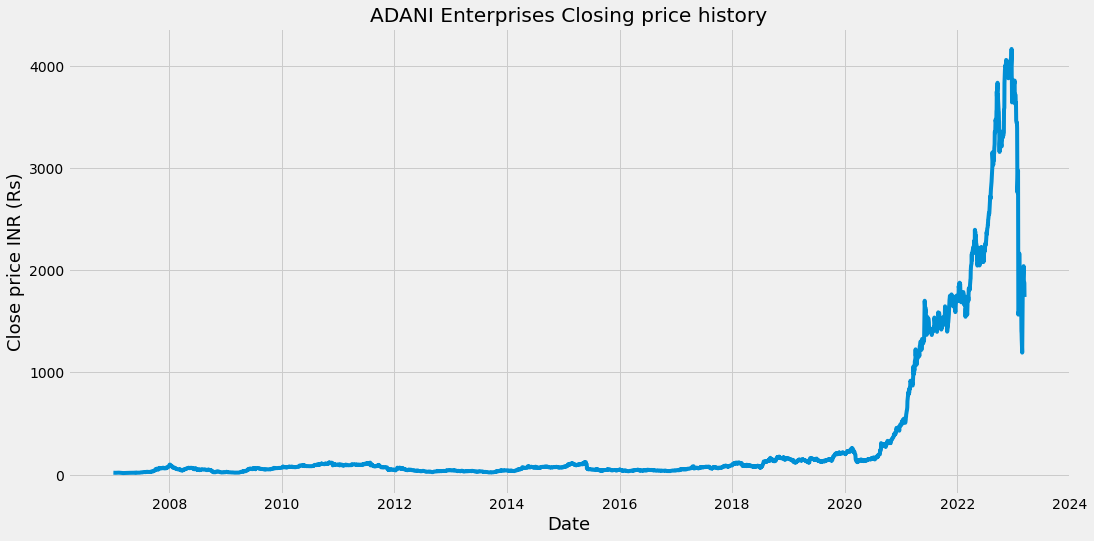

In [6]:
#Visualize closing price history

plt.figure(figsize=(16,8))
plt.title('ADANI Enterprises Closing price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price INR (Rs)',fontsize=18)
plt.show()

In [7]:
#Create new data frame with only the close price column
data = df.filter(['Close'])
print(data)

#Convert the dataframe to a numpy array
dataset = data.values

print(dataset)

#Get no of rows to train the model 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

                  Close
Date                   
2007-01-02    17.760748
2007-01-03    17.653454
2007-01-04    17.423542
2007-01-05    18.074961
2007-01-08    17.848881
...                 ...
2023-03-08  2039.650024
2023-03-09  1953.150024
2023-03-10  1896.199951
2023-03-13  1874.400024
2023-03-14  1738.199951

[3996 rows x 1 columns]
[[  17.76074791]
 [  17.65345383]
 [  17.42354202]
 ...
 [1896.19995117]
 [1874.40002441]
 [1738.19995117]]


3197

In [8]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data 

array([[0.00084004],
       [0.00081419],
       [0.0007588 ],
       ...,
       [0.4533641 ],
       [0.44811241],
       [0.41530123]])

In [9]:
#Create training dataset
#Create scaled training dataset
train_data = scaled_data[0:training_data_len,:]

print(train_data)
#Split the dataset x_train and y_train datasets
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()


[[0.00084004]
 [0.00081419]
 [0.0007588 ]
 ...
 [0.04694653]
 [0.04689835]
 [0.04693448]]
[array([8.40035450e-04, 8.14187845e-04, 7.58801104e-04, 9.15730662e-04,
       8.61267034e-04, 7.08029925e-04, 6.25872467e-04, 6.77566758e-04,
       7.18183701e-04, 7.42185082e-04, 6.72951197e-04, 7.91110036e-04,
       7.56031767e-04, 6.66489410e-04, 6.71104972e-04, 6.11102669e-04,
       6.28641804e-04, 6.70181859e-04, 6.48950276e-04, 8.16034069e-04,
       9.44347145e-04, 9.85887200e-04, 9.86810313e-04, 1.20466574e-03,
       1.00434991e-03, 9.42500920e-04, 7.25569060e-04, 4.38480202e-04,
       5.29868324e-04, 7.72647789e-04, 7.48646868e-04, 6.55412062e-04,
       5.88947973e-04, 5.64947052e-04, 5.86178636e-04, 4.94790055e-04,
       5.13252301e-04, 4.80020257e-04, 4.47710866e-04, 4.20940608e-04,
       3.67400092e-04, 1.37544429e-04, 5.53890381e-06, 0.00000000e+00,
       1.26466851e-04, 1.16312615e-04, 1.92931399e-04, 2.26163443e-04,
       1.08004604e-04, 1.41236648e-04, 1.39390653e-04, 1.

In [10]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

print (x_train)
print (y_train)

x_train.shape

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[[0.00084004 0.00081419 0.0007588  ... 0.00026678 0.00038955 0.0004394 ]
 [0.00081419 0.0007588  0.00091573 ... 0.00038955 0.0004394  0.00034248]
 [0.0007588  0.00091573 0.00086127 ... 0.0004394  0.00034248 0.00038125]
 ...
 [0.03210682 0.03334748 0.03256454 ... 0.04728379 0.04927126 0.04824741]
 [0.03334748 0.03256454 0.03169729 ... 0.04927126 0.04824741 0.04694653]
 [0.03256454 0.03169729 0.0311673  ... 0.04824741 0.04694653 0.04689835]]
[0.00034248 0.00038125 0.00045602 ... 0.04694653 0.04689835 0.04693448]


(3137, 60, 1)

In [12]:
#Build the model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

In [13]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=1,verbose="auto")

3137/3137 [==============================] - 140s 43ms/step - loss: 1.0421e-05


In [17]:
#Create a test data set
#Create a new array containing scaled values from index 3262 to 4077
print(training_data_len)
test_data = scaled_data[training_data_len - 60:,:]


#Create data sets x_test and y_test
x_test =[]
y_test =dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])



#Convert data to a numpy array
x_test = np.array(x_test)


#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))


3197


In [19]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

25/25 [==============================] - 1s 42ms/step


In [20]:
#Get the root mean sqaured error (RMSE) for the model
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


140.50564053781275

<ipython-input-21-b3631acfc1a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

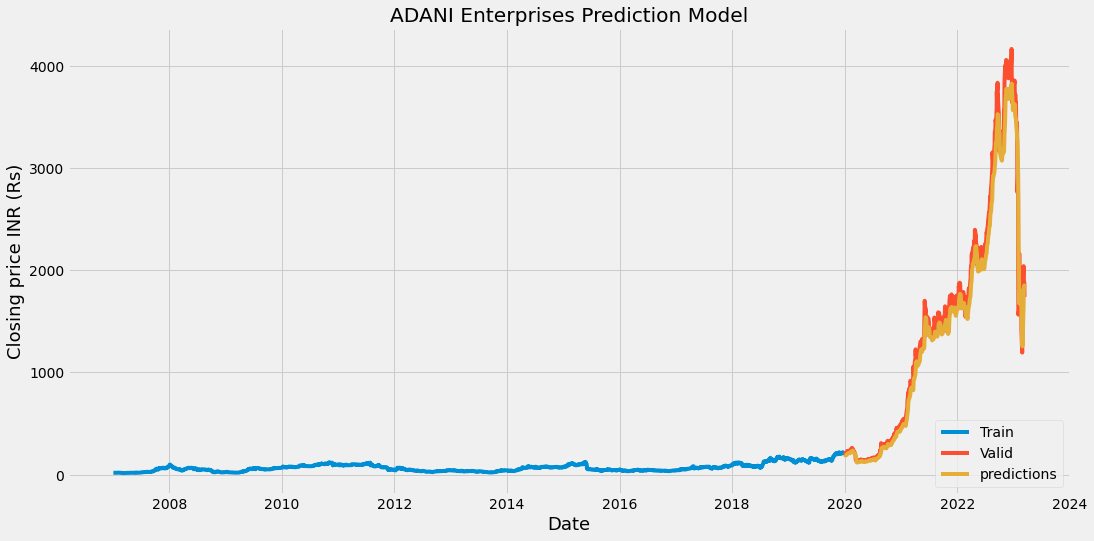

In [21]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions


#Visualize the data
plt.figure(figsize=(16,8))
plt.title('ADANI Enterprises Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price INR (Rs)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train','Valid','predictions'], loc='lower right')
plt.show

In [22]:
#Show valid(Actual) and predicted stock prices 
valid


,Close,predictions
Date,,
2019-12-30,208.649994,193.514832
2019-12-31,208.350006,192.689072
2020-01-01,207.850006,192.060471
2020-01-02,211.199997,191.538467
2020-01-03,208.300003,192.038696
...,...,...
2023-03-08,2039.650024,1649.529419
2023-03-09,1953.150024,1771.585693
2023-03-10,1896.199951,1835.792603


In [58]:
#Get the quote
adanient_quote = yf.download('ADANIENT.NS',start='2007-01-01', end='2023-03-15')
#Create new data frame
new_df = adanient_quote.filter(['Close'])
#Get the last  days closing price values and convert them into array
last_60_days = new_df[-180:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

[*********************100%***********************]  1 of 1 completed


In [59]:
#Create an empty list
X_test = []
#Append past 60 days data
X_test.append(last_60_days_scaled)

In [60]:
#Convert the X_Test dataset to numpy array 
X_test=np.array(X_test)

In [61]:
#Reshape the 2D data into 3D array
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [63]:
#Get the predicted scaled price
pred_price = model.predict(X_test,verbose='auto')


1/1 [==============================] - 0s 50ms/step


In [64]:
#Undo Scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1788.645]]


In [70]:
#Get the root mean sqaured error (RMSE) for the model
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

140.50564053781275

In [75]:
#Get the quote
adanient_quote2 = yf.download('ADANIENT.NS',start='2023-03-16', end='2023-03-18')
print(adanient_quote2)

[*********************100%***********************]  1 of 1 completed
              Open         High     Low        Close    Adj Close   Volume
Date                                                                      
2023-03-16  1861.0  1875.000000  1795.0  1843.800049  1843.800049  6509495
2023-03-17  1901.0  1918.849976  1845.0  1876.550049  1876.550049  5964875
